In [1]:
import pandas as pd
from mplsoccer import Pitch

In [2]:
df = pd.read_csv('Liverpool_events.csv')
df.head()

,id,event_id,minute,second,team_id,team_name,player_id,x,y,end_x,end_y,is_touch,is_shot,is_goal,type,outcome,period,name,shirt_no,position
0,2744720053,3,0,0,36,Leverkusen,299684,50.0,50.0,34.2,45.4,True,False,False,Pass,Successful,FirstHalf,Exequiel Palacios,25,MC
1,2744720087,4,0,5,36,Leverkusen,369446,45.9,48.7,40.7,71.4,True,False,False,Pass,Successful,FirstHalf,Edmond Tapsoba,12,DC
2,2744720113,5,0,7,36,Leverkusen,134946,40.7,71.4,42.1,87.3,True,False,False,Pass,Successful,FirstHalf,Jonathan Tah,4,DC
3,2744720151,6,0,9,36,Leverkusen,404832,42.6,88.5,100.0,79.7,True,False,False,Pass,Unsuccessful,FirstHalf,Piero Hincapié,3,DC
4,2744720297,4,0,22,26,Liverpool,95408,5.0,61.1,3.5,49.6,True,False,False,Pass,Successful,FirstHalf,Virgil van Dijk,4,DC


In [3]:
#Filtering for passes
df = df[df['type'] == 'Pass']

In [4]:
#Making the pass progressive
df['progressive'] = (df['end_x'] >= 80) & (df['x'] < 80)

In [5]:
df.progressive.value_counts()

False    1002
True       64
Name: progressive, dtype: int64

In [6]:
#Filtering only the progressive passes
df = df[df['progressive'] == True]

In [7]:
df.name.unique()

array(['Piero Hincapié', 'Cody Gakpo', 'Trent Alexander-Arnold',
       'Jeremie Frimpong', 'Luis Díaz', 'Caoimhín Kelleher',
       'Mohamed Salah', 'Ryan Gravenberch', 'Florian Wirtz',
       'Virgil van Dijk', 'Jonathan Tah', 'Edmond Tapsoba',
       'Álex Grimaldo', 'Alexis Mac Allister', 'Curtis Jones',
       'Kostas Tsimikas', 'Aleix García', 'Robert Andrich',
       'Granit Xhaka', 'Nathan Tella', 'Dominik Szoboszlai'], dtype=object)

In [8]:
#Filtering for player
df = df[df['name'] == 'Trent Alexander-Arnold']

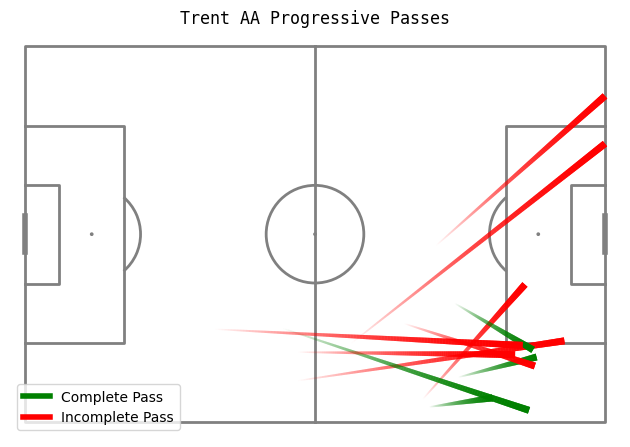

In [20]:
pitch = Pitch(pitch_type='opta', pitch_color='white', line_color='grey', line_zorder=2)

fig, ax = pitch.draw()
for x in df.to_dict(orient='records'):
    
    # We'll use the pitch.lines method to plot the passes
    if x['outcome'] == 'Successful':
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=5, transparent=True, comet=True, ax=ax, color='g')
    else:
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=5, transparent=True, comet=True, ax=ax, color='r')
        
    # if we wanted to we could use pitch.arrows to plot the passes
    # if x['pass_outcome'] == "Complete":
    #     pitch.arrows(x['x'], x['y'], x['end_x'], x['end_y'], ax=ax, color='b')
    # else:
    #     pitch.arrows(x['x'], x['y'], x['end_x'], x['end_y'], ax=ax, color='r')

# Lets add a title
ax.set_title("Trent AA Progressive Passes", fontsize=12, fontfamily='monospace')

# We can also add a legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='g', lw=4, label='Complete Pass'),
    Line2D([0], [0], color='r', lw=4, label='Incomplete Pass')
]

ax.legend(handles=legend_elements, loc='lower left')

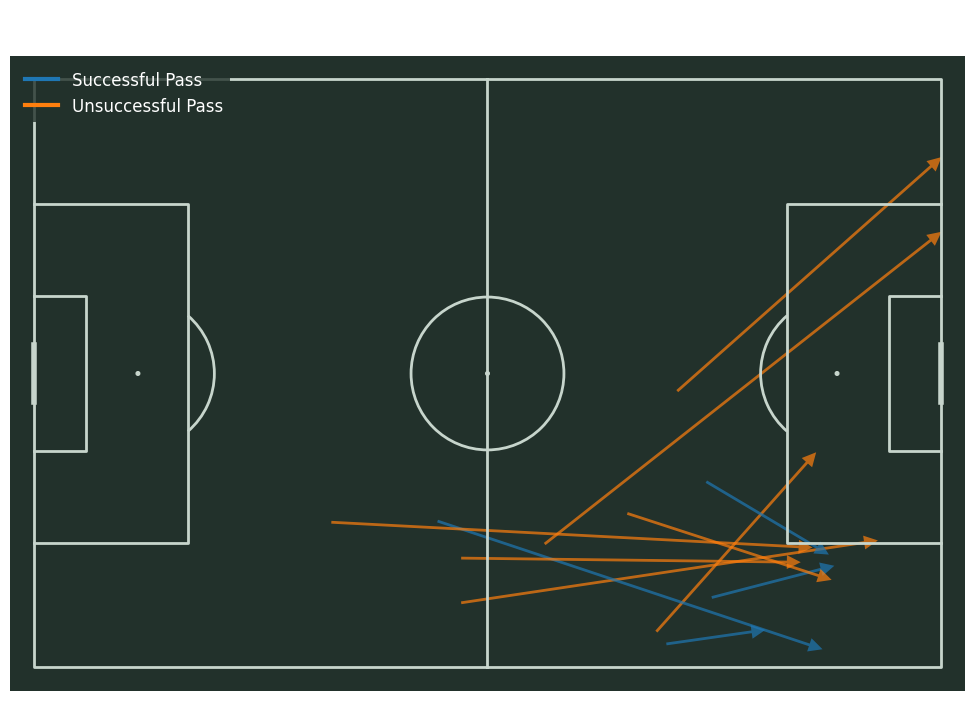

In [36]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Initialize the pitch with improved aesthetics
pitch = Pitch(
    pitch_type='opta',
    pitch_color='#22312b',  # Dark blue background
    line_color='#c7d5cc',   # Light grey pitch lines
    line_zorder=2,
)

fig, ax = pitch.draw(figsize=(10, 7))

# Define color scheme
successful_color = '#1f77b4'     # Blue for successful passes
unsuccessful_color = '#ff7f0e'   # Orange for unsuccessful passes

# Plot passes with arrows
for x in df.to_dict(orient='records'):
    color = successful_color if x['outcome'] == 'Successful' else unsuccessful_color
    pitch.arrows(
        x['x'], x['y'],
        x['end_x'], x['end_y'],
        ax=ax,
        color=color,
        width=2,
        headwidth=5,
        headlength=5,
        headaxislength=5,
        alpha=0.7
    )

# Optional: Highlight pass start points
# pitch.scatter(
#     df['x'], df['y'],
#     ax=ax,
#     color='white',
#     edgecolor='black',
#     linewidth=0.5,
#     zorder=3
# )

# Add an improved title
ax.set_title(
    "Trent Alexander-Arnold Progressive Passes",
    fontsize=18,
    fontweight='bold',
    color='white',
    pad=20
)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color=successful_color, lw=3, label='Successful Pass'),
    Line2D([0], [0], color=unsuccessful_color, lw=3, label='Unsuccessful Pass')
]

legend = ax.legend(
    handles=legend_elements,
    loc='upper left',
    facecolor='#22312b',
    edgecolor='none',
    fontsize=12
)

# Set legend text color to white
for text in legend.get_texts():
    text.set_color("white")

# Display the plot
plt.show()


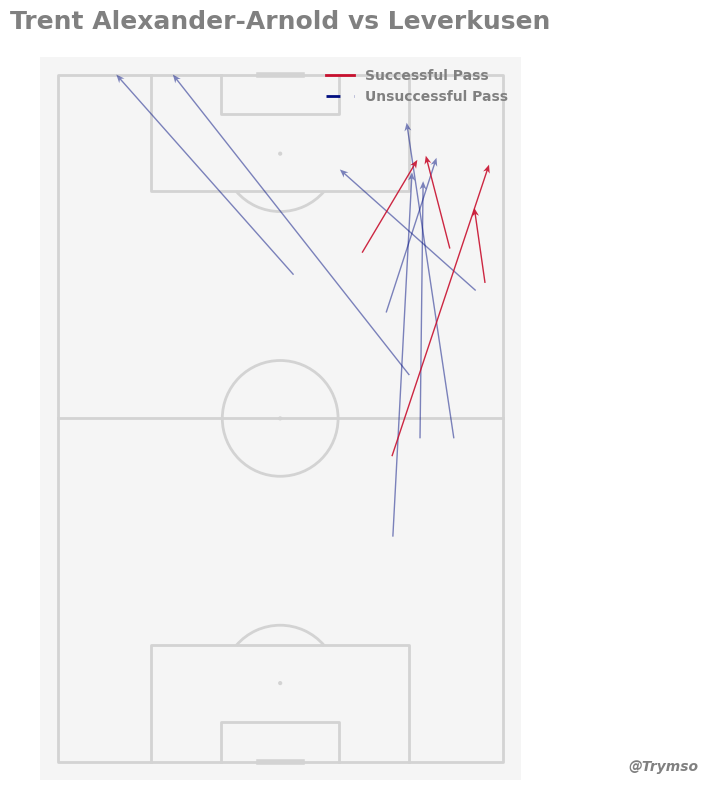

In [34]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Create the pitch with similar design
pitch = VerticalPitch(
    pitch_type='opta', 
    pitch_color='#f5f5f5', 
    line_color='#d3d3d3', 
    line_zorder=1, 
)
fig, ax = pitch.draw(figsize=(12, 8))

# Filter dataframe to include only successful and unsuccessful passes
df_filtered = df[
    (df['type'] == 'Pass')  # Only passes
]

# Loop through the dataframe and plot passes based on their outcome
for _, row in df_filtered.iterrows():
    if row['outcome'] == 'Successful':
        # Plot successful passes as arrows
        pitch.arrows(
            xstart=row['x'], ystart=row['y'], 
            xend=row['end_x'], yend=row['end_y'], 
            ax=ax, color='#c8102E', width=1, headwidth=5, headlength=6, lw=2, alpha=0.9, zorder=2
        )
    else:
        # Plot unsuccessful passes as dashed arrows
        pitch.arrows(
            xstart=row['x'], ystart=row['y'], 
            xend=row['end_x'], yend=row['end_y'], 
            ax=ax, color='#010E80', width=1, headwidth=5, headlength=6, lw=2, 
            linestyle=(0, (5, 5)), alpha=0.5, zorder=1
        )

# Add a legend with the same style
legend_elements = [
    plt.Line2D([0], [0], color='#c8102E', lw=2, label='Successful Pass'),
    plt.Line2D([0], [0], color='#010E80', lw=2, label='Unsuccessful Pass', linestyle=(0, (5, 5))),
]
legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=False)

# Change the text color in the legend to grey
for text in legend.get_texts():
    text.set_color('grey')
    text.set_fontweight('bold')
    text.set_fontfamily('DejaVu Sans')

# Add a title
ax.set_title(
    "Trent Alexander-Arnold vs Leverkusen",
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='grey', 
    pad=20
)

# Add Twitter handle
fig.text(
    0.79, 
    0.03, 
    '@Trymso', 
    fontsize=10, 
    fontstyle='italic',
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='gray'
)

# Show the plot
plt.show()
